## Q1

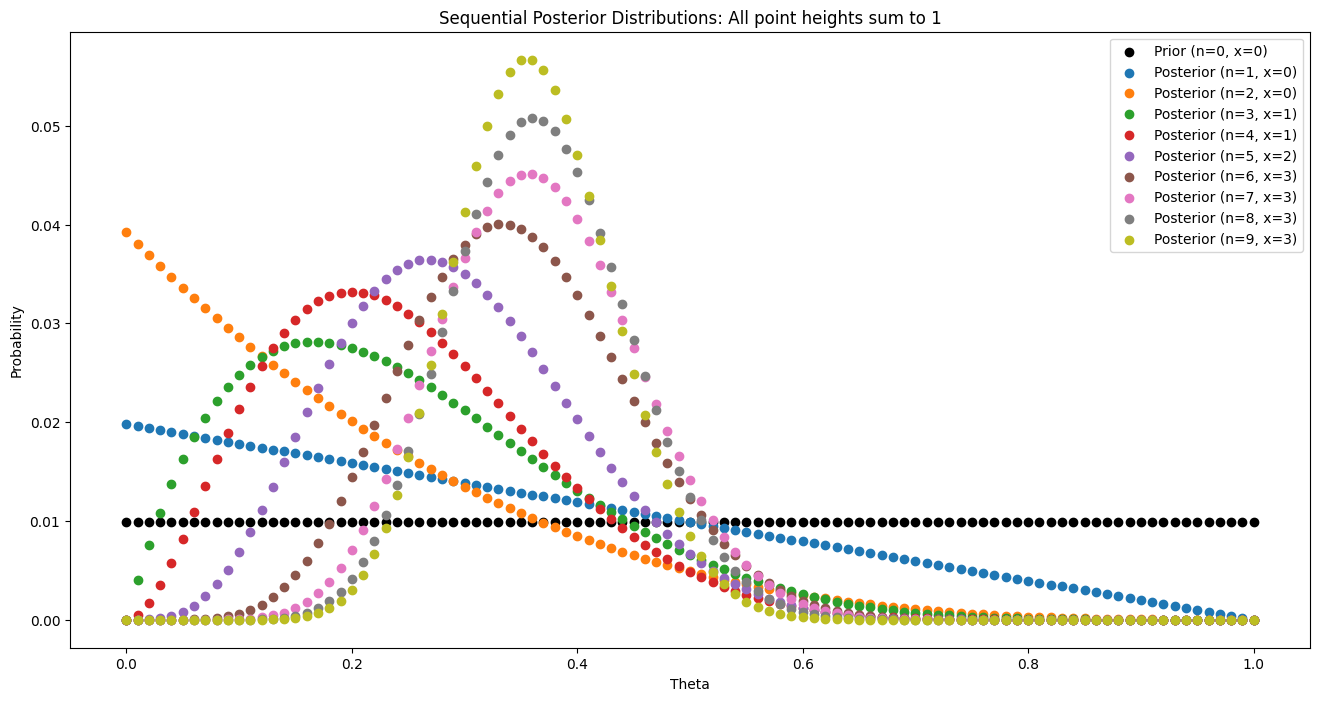

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Define the parameter domain and the uniform prior
parameter_domain = np.linspace(0, 1, 101)  # theta values from 0 to 1 (101 points)
prior = np.ones(101) / 101  # uniform prior

# Define observations
observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]  # observed data (binary)
n, x = 0, 0  # Initialize counters for total trials (n) and successes (x)

# Set up the plot
plt.figure(figsize=(16, 8))
plt.scatter(parameter_domain, prior, label="Prior (n=0, x=0)", color='k')
plt.title("Sequential Posterior Distributions: All point heights sum to 1")

# Sequentially update the posterior for each observation
for observation in observations:
    n += 1
    x += observation

    likelihood = stats.binom.pmf(x, n, parameter_domain)
    posterior = likelihood * prior
    posterior /= posterior.sum()

    prior = posterior

    plt.scatter(parameter_domain, posterior, label=f"Posterior (n={n}, x={x})")

plt.legend()
plt.xlabel("Theta")
plt.ylabel("Probability")
plt.show()



# Q2

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# True success probabilities for the two arms
theta_true = [0.4, 0.6]
num_arms = len(theta_true)

# Prior parameters (Beta distribution) for each arm
alpha = np.ones(num_arms)
beta = np.ones(num_arms)

T = 500 # Number of iterations

# Track rewards and arm selections
rewards = np.zeros(T)
arm_choices = np.zeros(T, dtype=int)


In [13]:
# Simulation
for t in range(T):
    sampled_thetas = np.random.beta(alpha, beta)
    chosen_arm = np.argmax(sampled_thetas)

    reward = np.random.rand() < theta_true[chosen_arm]  # 1 if success, 0 if failure

    alpha[chosen_arm] += reward
    beta[chosen_arm] += 1 - reward

    rewards[t] = reward
    arm_choices[t] = chosen_arm

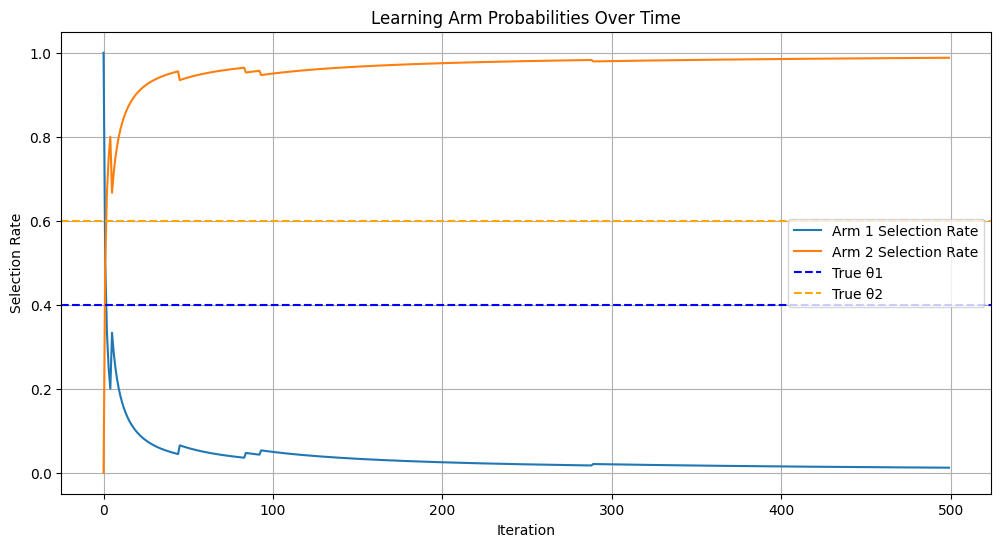

Final alpha: [  1. 279.]
Final beta: [  7. 217.]


In [12]:
# Visualization of arm selection over time
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(arm_choices == 0) / (np.arange(T) + 1), label="Arm 1 Selection Rate")
plt.plot(np.cumsum(arm_choices == 1) / (np.arange(T) + 1), label="Arm 2 Selection Rate")
plt.axhline(y=theta_true[0], color='blue', linestyle='--', label="True θ1")
plt.axhline(y=theta_true[1], color='orange', linestyle='--', label="True θ2")
plt.title("Learning Arm Probabilities Over Time")
plt.xlabel("Iteration")
plt.ylabel("Selection Rate")
plt.legend()
plt.grid()
plt.show()

print("Final alpha:", alpha)
print("Final beta:", beta)


## Q3

### Approach 1: Beta-Binomial Model for Each Arm

Each arm is modeled independently using a Beta prior and Binomial likelihood. We update the posterior for each arm separately as data is observed.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Number of iterations
T = 500

# True success probabilities for the three arms
theta_true = [0.45, 0.55, 0.5]

# Track rewards and arm choices
rewards = np.zeros(T)
arm_choices = np.zeros(T, dtype=int)

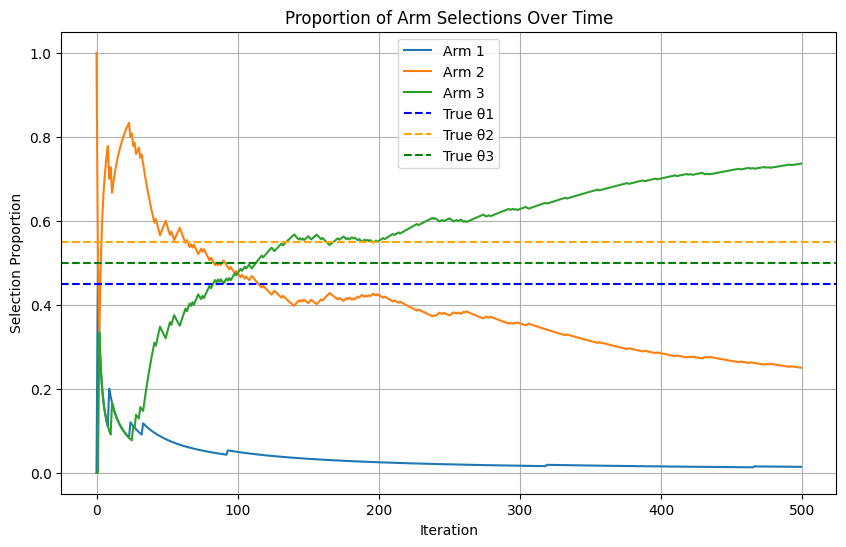

In [26]:
# Prior parameters for Beta distributions
alpha = np.ones(len(theta_true))
beta = np.ones(len(theta_true))


# Simulation
for t in range(T):
    sampled_thetas = np.random.beta(alpha, beta)
    chosen_arm = np.argmax(sampled_thetas)

    reward = np.random.rand() < theta_true[chosen_arm]

    alpha[chosen_arm] += reward
    beta[chosen_arm] += 1 - reward

    rewards[t] = reward
    arm_choices[t] = chosen_arm

# Plot the proportion of times each arm is selected
plt.figure(figsize=(10, 6))
for i in range(len(theta_true)):
    plt.plot(np.cumsum(arm_choices == i) / (np.arange(T) + 1), label=f'Arm {i + 1}')
plt.axhline(y=theta_true[0], color='blue', linestyle='--', label="True θ1")
plt.axhline(y=theta_true[1], color='orange', linestyle='--', label="True θ2")
plt.axhline(y=theta_true[2], color='green', linestyle='--', label="True θ3")
plt.title("Proportion of Arm Selections Over Time")
plt.xlabel("Iteration")
plt.ylabel("Selection Proportion")
plt.legend()
plt.grid()
plt.show()


### Approach 2: Dirichlet-Multinomial Model

Instead of modeling each arm independently, we use a single Dirichlet prior to model the success probabilities of all arms jointly. This captures correlations between the arms, assuming a shared pool of successes.

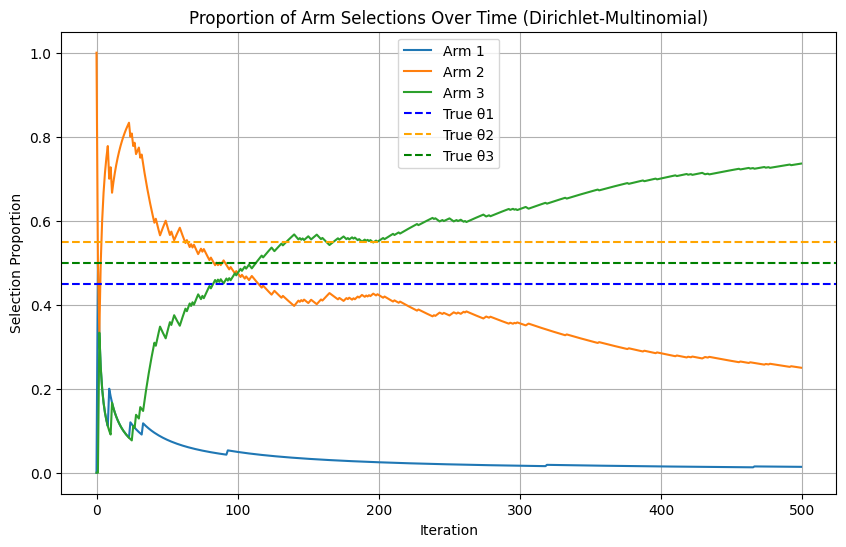

In [27]:
# Initialize Dirichlet prior parameters
dirichlet_alpha = np.ones(len(theta_true))
counts = np.zeros(len(theta_true))

# Simulation
for t in range(T):
    sampled_probs = np.random.dirichlet(dirichlet_alpha + counts)
    chosen_arm = np.argmax(sampled_probs)

    # Simulate pulling the chosen arm
    reward = np.random.rand() < theta_true[chosen_arm]
    counts[chosen_arm] += reward

# Plot the proportion of times each arm is selected
plt.figure(figsize=(10, 6))
for i in range(len(theta_true)):
    plt.plot(np.cumsum(arm_choices == i) / (np.arange(T) + 1), label=f'Arm {i + 1}')
plt.axhline(y=theta_true[0], color='blue', linestyle='--', label="True θ1")
plt.axhline(y=theta_true[1], color='orange', linestyle='--', label="True θ2")
plt.axhline(y=theta_true[2], color='green', linestyle='--', label="True θ3")
plt.title("Proportion of Arm Selections Over Time (Dirichlet-Multinomial)")
plt.xlabel("Iteration")
plt.ylabel("Selection Proportion")
plt.legend()
plt.grid()
plt.show()


### Comparison Analysis
- The Beta-Binomial model transitions to exploitation faster, focusing on the arm with the highest success probability.
- The Dirichlet-Multinomial model maintains more balanced exploration, allocating some resources to suboptimal arms.

The Beta-Binomial approach assumes no relationships between arms, but the Dirichlet-Multinomial approach assumes a shared structure, making it more robust when correlations exist. Altogether, the Beta-Binomial model converges more sharply, while the Dirichlet-Multinomial approach converges more gradually, reflecting the joint learning process.

### Real-World Example:

Testing three variations of a website to determine which version is the most effective at achieving a high click-through rate.

- Variant 1 (Arm 1): First website design.
- Variant 2 (Arm 2): Second website design.
- Variant 3 (Arm 3): Third website design.

The goal is to determine which variant maximizes success while efficiently balancing exploration and exploitation.

Depending on the experiment design conditions, it will be recommended to use ether the Beta-Binomial or Dirichlet-Multinomial experiment.

**Beta-Binomial (Independent)**:
- Scenario: Testing three completely different website designs sent to different groups of customers.
- Reasoning: No overlap in customer base, and the performance of one campaign does not affect the others. This is beneficial because the Beta-Binomial assumes no relationship between the arms and is good when are arms are independent since its simpler to implement.

**Dirichlet-Multinomial (Joint):**
- Scenario: Testing three versions of a website homepage shown to all visitors so traffic is shared among variants.
- Reasoning: If users are switching between versions, their success probabilities are linked since a superior design might be taking time away from a customer viewing the other designs. The Dirichlet-Multinmoial captures correlations between arms and is useful when arms are related.


**Conclusion**:
- If the arms are independent, the Beta-Binomial approach is more appropriate due to its simplicity and clarity.
- If the arms are correlated, the Dirichlet-Multinomial approach is better, as it accounts for shared resources or dependencies.